In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [20]:
df = pd.read_csv('Fish.csv',index_col=None)

In [21]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [22]:
data1 = df['Species'].to_numpy()
data1 = data1.reshape(-1,1)
encoder = OrdinalEncoder()
result1 = encoder.fit_transform(data1)
df['Species'] = result1

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0.0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0.0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0.0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0.0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0.0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [23]:
y = df['Weight']
df_features = df.drop(['Weight'],axis=1)
dataset = df_features.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)


In [24]:
reg = LinearRegression().fit(X_train,y_train)
predicted = reg.predict(X_test)

## Testing with scikitlearn

In [25]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted)))

r2 socre is 0.9034878699241472
mean_sqrd_error is== 13727.81655300653
root_mean_squared error of is== 117.16576527726232


In [26]:
X_train_num = np.dot(X_train,1000).astype(int)
X_test_num = np.dot(X_test,1000).astype(int)
y_train_num = y_train
y_test_num = y_test

In [27]:
reg = LinearRegression().fit(X_train_num,y_train)
predicted_num = reg.predict(X_test_num)

In [28]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted_num)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted_num))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted_num)))

r2 socre is 0.9034864301931047
mean_sqrd_error is== 13728.021339323263
root_mean_squared error of is== 117.16663919103962


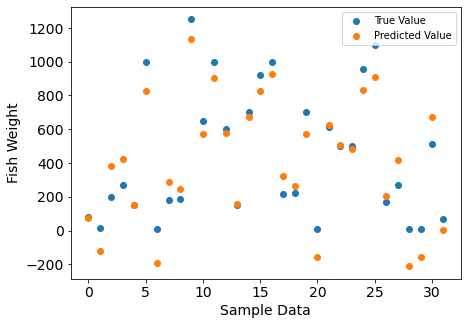

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
x = np.arange(len(y_test))
plt.scatter(x, y_test,label="True Value")
plt.scatter(x, predicted_num,label="Predicted Value")
plt.xlabel('Sample Data', size=14)
plt.ylabel('Fish Weight', size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.savefig('Fish.pdf',bbox_inches='tight')
plt.show()

In [33]:
#shortening numners 
def shorter(c,d):
    c = int(c)
    d = int(d)
    if(c<0):
        n = c*(-1)
        if(len(str(n))==len(str(d)) and len(str(n))>3):      
            a = f"{n:.0f}"
            a = str(a[:-3])
            a = int(a)*(-1)
            b = f"{d:.0f}"
            b = str(b[:-3])
            b = int(b)
        elif(len(str(n))>=3 and len(str(d))>=3):
            a = f"{n:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-2
            else:
                s = len(str(b))-2
            a = int(a[:-s])
            b = int(b[:-s])
            a = a*-1 
        else:
            a = int(n*-1)
            b = d
    elif(len(str(c))==len(str(d)) and len(str(c))>3):      
            a = f"{c:.0f}"
            a = str(a[:-2])
            a = int(a)
            b = f"{d:.0f}"
            b = str(b[:-2])
            b = int(b)
#     elif(len(str(c))==1 and len(str(d))>3):
#         a = int(0)
#         b = int(1)
    elif(len(str(c))>3 and len(str(d))>3):
            a = f"{c:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-3
            else:
                s = len(str(b))-3
            a = int(a[:-s])
            b = int(b[:-s])
    else:
        a = c
        b = d
    return a,b

#condensed function multiply and add matrix with numerator and denominator one row at a time
# Python Program to find the L.C.M. of two input number
from math import gcd
def compute_lcm(x, y):
   # choose the greater number 
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if(x==0):
            lcm = y
            break
        elif(y==0):
            lcm = x
            break
        elif((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm
 
#Subtracting 2 numbers of the form a/b -c/d
def subtraction(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) - ((den/d)*c)
    return num,den

#adding array of elements of the form x/y
def add_array(a_num,a_den):
    #will work for an int array of any length
    lcm = 1;sum1 =0
    for i in a_den:
        lcm = int(lcm*i/gcd(lcm, i))
#     print("lcm is ",lcm)
    for i in range(len(a_num)):
        sum1 = sum1 + (a_num[i]*(a_den[i]/lcm))
#         print(a_num[i],a_den[i],lcm)      
#     print("sum is ", sum1)
    return sum1,lcm

#adding two numbers of the form a/b + c/d
def addition(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) + ((den/d)*c)
    return int(num),int(den)

#multiplying two arrays of fraction and adding them  for row by column multiplication
def multiply(a_num,a_den,b_num, b_den):
#     print(type(a_num))
    z_num = np.zeros(len(a_num)).astype(int)
    z_den = np.zeros(len(a_den)).astype(int)
#     print("printing anum,aden,bnum,bden",a_num,a_den,b_num,b_den)                                   
    for i in range(len(a_num)):
        z_num[i]=(a_num[i]*b_num[i])     
        z_den[i]=(a_den[i]*b_den[i])
    
    x = z_num.tolist()
    y = z_den.tolist()
#     print("Printing z_num and z_den", x , y )
    num,den = add_array(x,y)
#     print("multiplication results is",num,den) 
    return num,den

#claculate y_hat =wx+b | x is in the form a single array and w is in the form of array too
# need toc hange w into wnum and wden
def y_hat(w_num,w_den,x_num,x_den,b):
    y_hat_num = np.zeros(x_num.shape[0]).astype(int)
    y_hat_den = np.zeros(x_den.shape[0]).astype(int)
    #multiplying w and x
    for i in range(x_num.shape[0]):
#         print("iteration number ",i)
        x_n = x_num[i] 
        x_d = x_den[i] 
#         print(x_n,x_d,w_num,w_den)
        temp_n, temp_d = multiply(x_n,x_d,w_num,w_den)
#         print("printing temporary values",temp_n,temp_d)
        y_hat_num[i],y_hat_den[i] = addition( temp_n, temp_d,b[0],b[1])
        y_hat_num[i],y_hat_den[i] = shorter(y_hat_num[i],y_hat_den[i])   #trying this
#     print("y_hat values for this iterationsa are",y_hat_num,y_hat_den)
    return y_hat_num,y_hat_den

#calculating mean square values
def mse(y_hat_num,y_hat_den,y_num,y_den,n):
    num=0;den =0
    for i in range(len(y_hat_num)):
        num1,den1=subtraction(y_num[i],y_den[i],y_hat_num[i],y_hat_den[i])
        num1 = num1*num1
        den1 = den1*den1
        num,den = addition(num,den,num1,den1)
    den = den * n
#     print(num,den)
    return num,den

#calculating subtraction of Y_hat Y
def y_hat_substraction(y_hat_num,y_hat_den,y_num,y_den):
    y_diff =np.zeros((y_hat_num.shape[0],2))
    for i in range(len(y_hat_num)):
        y_diff[i][0],y_diff[i][1] = subtraction(y_hat_num[i],y_hat_den[i], y_num[i], y_den[i])
    return y_diff

#getting delta w with respect 
#need change - can call the subtraction of y_hat from y
def delta_w(y_hat_diff,x_num, x_den, n):
    del_w_num = np.zeros(x_num.shape[1])
    del_w_den = np.zeros(x_num.shape[1])
    
    x_num = x_num.T
    x_den = x_den.T
    y_num = y_hat_diff[:,0]
    y_den = y_hat_diff[:,1]
    
#     print("getting delta w num and den ")
    for i in range(len(del_w_num)):
#         print("printing X",len(x_num[i]))
#         print("printing X",len(x_den[i]))
#         print("printing y diff",len( y_num))
#         print("printing y diff", len(y_den))
        del_w_num[i],del_w_den[i] = multiply(x_num[i],x_den[i],y_num,y_den)
        del_w_num[i] = del_w_num[i]*2
        del_w_den[i] = del_w_den[i]*n
#     print("delta w num and den are",del_w_num,del_w_den)
    return del_w_num,del_w_den


#getting delta b 
def delta_b(y_hat_diff):

#     print(type(y_hat_diff))
    yh_num = np.array(y_hat_diff[:,0]).astype(int)
    yh_den = np.array(y_hat_diff[:,1]).astype(int)
#     print(type(yh_num[0]))
#     print(type(yh_den[0]))    
#     print("printing yh_num",yh_num)
#     print("printing yh_den",yh_den)
    num,den = add_array(yh_num, yh_den)
    num = num*2
    den = den*len(yh_num)
#     print("printing delta_b", num,den)
    return num,den

# get new weights and biases
def get_new_params(lr, dw_num,dw_den,db_num,db_den,w_num,w_den,b_num,b_den):
    
    for i in range(len(dw_num)):
        dw_num[i]= dw_num[i]*lr[0]
        dw_den[i]= dw_den[i]*lr[1]
   
    btemp_num = lr[0] * db_num
    btemp_den = lr[1] * db_den 

    for i in range(len(dw_num)):
        dw_num[i],dw_den[i] = subtraction(w_num[i],w_den[i],dw_num[i],dw_den[i]) 
    
    db_num,db_den = subtraction(b_num,b_den,btemp_num,btemp_den)
#     print("printing new weight parameters", dw_num,dw_den)
#     print("printing new bias parameters",db_num,db_den)
    return  dw_num,dw_den,db_num,db_den

#normalize weights and bias
def normalize_weights_bias(wnum,wden, bnum,bden):
    wn_num = np.zeros(10) 
    wn_den = np.zeros(10)
    for i in range (len(wf_num)):
        wn_num[i] = int((wnum[i]/wden[i]) * 100)
        wn_den[i] = 100
    bnum = int(bnum/bden * 100)
    bden = 100
    
#     print("Normalizing weights and biases",wn_num,wn_den, bnum, bden)
    return wn_num, wn_den,bnum, bden

In [35]:
X_train_num = X_train_num.astype(int)
X_test_num = X_test_num.astype(int)
y_train_num = y_train
y_test_num = y_test

X_train_num.shape

(127, 6)

In [36]:
X_train_den = np.full(X_train.shape, 1) 
X_test_den = np.full(X_test.shape, 1) 
y_train_den = np.ones(len(y_train))
y_test_den = np.ones(len(y_test))
X_train_den

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
 

In [38]:
wnum = np.ones(6)
wden = np.ones(6)
b =[1,1]
bnum =1
bden =1
lr = [1,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("bias is ",(b))
#     print("printing y_hat results",yh_num, yh_den)

    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)

    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
    y_diff

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))

    # get delta_b
    delb_num, delb_den = delta_b(y_diff)

    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)

    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    b[0] = bnum
    b[1] = bden
print(wnum,wden, bnum, bden)

KeyError: 9

In [ ]:
pred =[]
for i in range(X_test.shape[0]):
    sum =0
    for j in range (len(wnum)):
        sum = sum + X_test[i][j] * w[j]
    pred.append(sum+b)
print(pred)

In [ ]:
y_pred = np.array(pred)
y_pred

In [ ]:
score=r2_score(y_test,y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))